# Data Visualization

## Import Libraries

In [44]:
import pandas as pd
import seaborn as sns
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import xgboost as xgb

from scipy import stats
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
warnings.filterwarnings('ignore')

!pip install xgboost
import warnings

## Importing Dataset by pandas

In [3]:
df = pd.read_excel('http://data.iabac.org/exam/p2/data/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls', 'INX_Future_Inc_Employee_Perform', index_col=None)
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


### Correlation between Continuous Data

In [17]:
num =[u'Age', u'DistanceFromHome', u'EmpHourlyRate'
 , u'NumCompaniesWorked', u'EmpLastSalaryHikePercent', u'TotalWorkExperienceInYears'
 , u'TrainingTimesLastYear'
 , u'ExperienceYearsAtThisCompany', u'ExperienceYearsInCurrentRole'
 , u'YearsSinceLastPromotion', u'YearsWithCurrManager']
g=df[num]
g.corr()

,Age,DistanceFromHome,EmpHourlyRate,NumCompaniesWorked,EmpLastSalaryHikePercent,TotalWorkExperienceInYears,TrainingTimesLastYear,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.020937,0.062867,0.284408,-0.006105,0.680886,-0.016053,0.318852,0.217163,0.228199,0.205098
DistanceFromHome,0.020937,1.000000,0.013730,-0.021411,0.044974,0.027306,-0.032082,0.021908,0.019898,0.013246,0.017860
EmpHourlyRate,0.062867,0.013730,1.000000,0.040484,-0.015934,0.026034,-0.024160,-0.000399,-0.011871,-0.010000,-0.004576
NumCompaniesWorked,0.284408,-0.021411,0.040484,1.000000,-0.011788,0.221505,-0.050817,-0.129797,-0.097271,-0.031656,-0.109937
EmpLastSalaryHikePercent,-0.006105,0.044974,-0.015934,-0.011788,1.000000,-0.005933,-0.013439,-0.019830,-0.004957,-0.015911,-0.007666
TotalWorkExperienceInYears,0.680886,0.027306,0.026034,0.221505,-0.005933,1.000000,-0.022113,0.633555,0.460700,0.412781,0.460783
TrainingTimesLastYear,-0.016053,-0.032082,-0.024160,-0.050817,-0.013439,-0.022113,1.000000,0.008564,0.010222,0.018831,-0.013237
ExperienceYearsAtThisCompany,0.318852,0.021908,-0.000399,-0.129797,-0.019830,0.633555,0.008564,1.000000,0.764102,0.620230,0.759258
ExperienceYearsInCurrentRole,0.217163,0.019898,-0.011871,-0.097271,-0.004957,0.460700,0.010222,0.764102,1.000000,0.540600,0.728973
YearsSinceLastPromotion,0.228199,0.013246,-0.010000,-0.031656,-0.015911,0.412781,0.018831,0.620230,0.540600,1.000000,0.491199


Observation:
- If the correlation is 1 then data is positively correlated.
- If the correlation is 0 then data is not correlated.
- If the correlation is -1 then data is negatively correlated.
    

PerformanceRating         2    3    4   All
EmpDepartment                              
Data Science              1   17    2    20
Development              13  304   44   361
Finance                  15   30    4    49
Human Resources          10   38    6    54
Research & Development   68  234   41   343
Sales                    87  251   35   373
All                     194  874  132  1200


<Figure size 7200x4320 with 0 Axes>

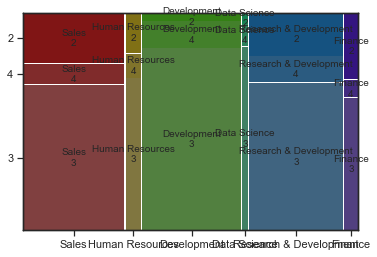

In [58]:
fi=plt.figure(figsize=(100,60))
from statsmodels.graphics.mosaicplot import mosaic
dept_crosstab=pd.crosstab(df['EmpDepartment'],df['PerformanceRating'], margins=True)
print(dept_crosstab)
pd.crosstab(df['EmpDepartment'],df['PerformanceRating'])
mosaic(df, ['EmpDepartment', 'PerformanceRating'])

plt.show()

Observation:
    - Total count of each department categorized by performaceRating.
    - Department development's performanceRating 3 is max.
    - DataScience's performanceRating 2 is mim

## Counting Percentage

In [37]:
dept_cross_count_perc=pd.crosstab(df['PerformanceRating'],df['EmpDepartment']).apply(lambda r: round(r*100/r.sum(),2), axis=1)
dept_cross_count_perc

EmpDepartment,Data Science,Development,Finance,Human Resources,Research & Development,Sales
PerformanceRating,,,,,,
2,0.52,6.70,7.73,5.15,35.05,44.85
3,1.95,34.78,3.43,4.35,26.77,28.72
4,1.52,33.33,3.03,4.55,31.06,26.52


[]

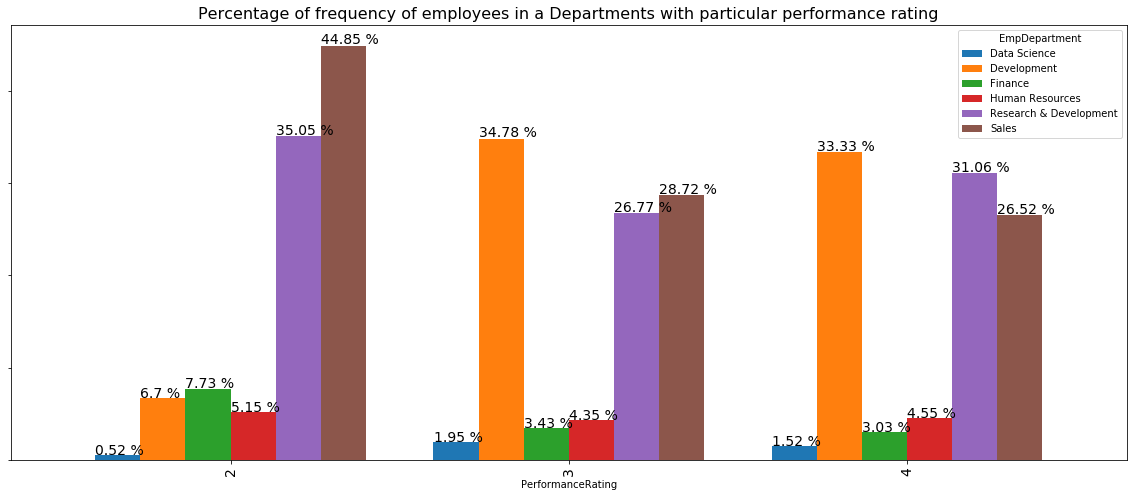

In [42]:
ax = dept_cross_count_perc.plot(kind='bar', figsize=(20, 8),fontsize=14, width=0.8)
ax.set_title('Percentage of frequency of employees in a Departments with particular performance rating',fontsize=16)
totals = []
for i in ax.patches:
    totals.append(i.get_width())
for p in ax.patches:
    ax.annotate(str(p.get_height())+' %', (p.get_x() * 1.0005, p.get_height() * 1.005),fontsize=14)
ax.tick_params(bottom="True", left="True")
ax.set_yticklabels([])

In [ ]:
Observation:
    -  Sales Performace percentage is high and category 2.
    -  DataScience performace percentage is very low and category 2.

### Chisquare test between EmpDepartment and performanceRating if they are depended or not
- H0 = EmpDepartment and performanceRating is independent
- H1 = EmpDepartment and performanceRating is dependent

In [45]:
EmpDepartment_chi_2,EmpDepartment_p_val,EmpDepartment_deg_free,EmpDepartment_freq_count=stats.chi2_contingency(pd.crosstab(df['EmpDepartment'],df['PerformanceRating']))
print("Chi square value : ",EmpDepartment_chi_2)
print("P value : ",EmpDepartment_p_val)
print("Degree of freedom : ",EmpDepartment_deg_free)
print("Expected Frequency Count matrix : ")
print(EmpDepartment_freq_count)

Chi square value :  70.32795982136973
P value :  3.832079093105312e-11
Degree of freedom :  10
Expected Frequency Count matrix : 
[[  3.23333333  14.56666667   2.2       ]
 [ 58.36166667 262.92833333  39.71      ]
 [  7.92166667  35.68833333   5.39      ]
 [  8.73        39.33         5.94      ]
 [ 55.45166667 249.81833333  37.73      ]
 [ 60.30166667 271.66833333  41.03      ]]


Observation:

- If p value < 0.05 then null Hypothesis or H0 is False.
- Here P value < 0.05 so H1 true
- Empdepartment and performanceRating is dependent

In [ ]:
## Pair Plot

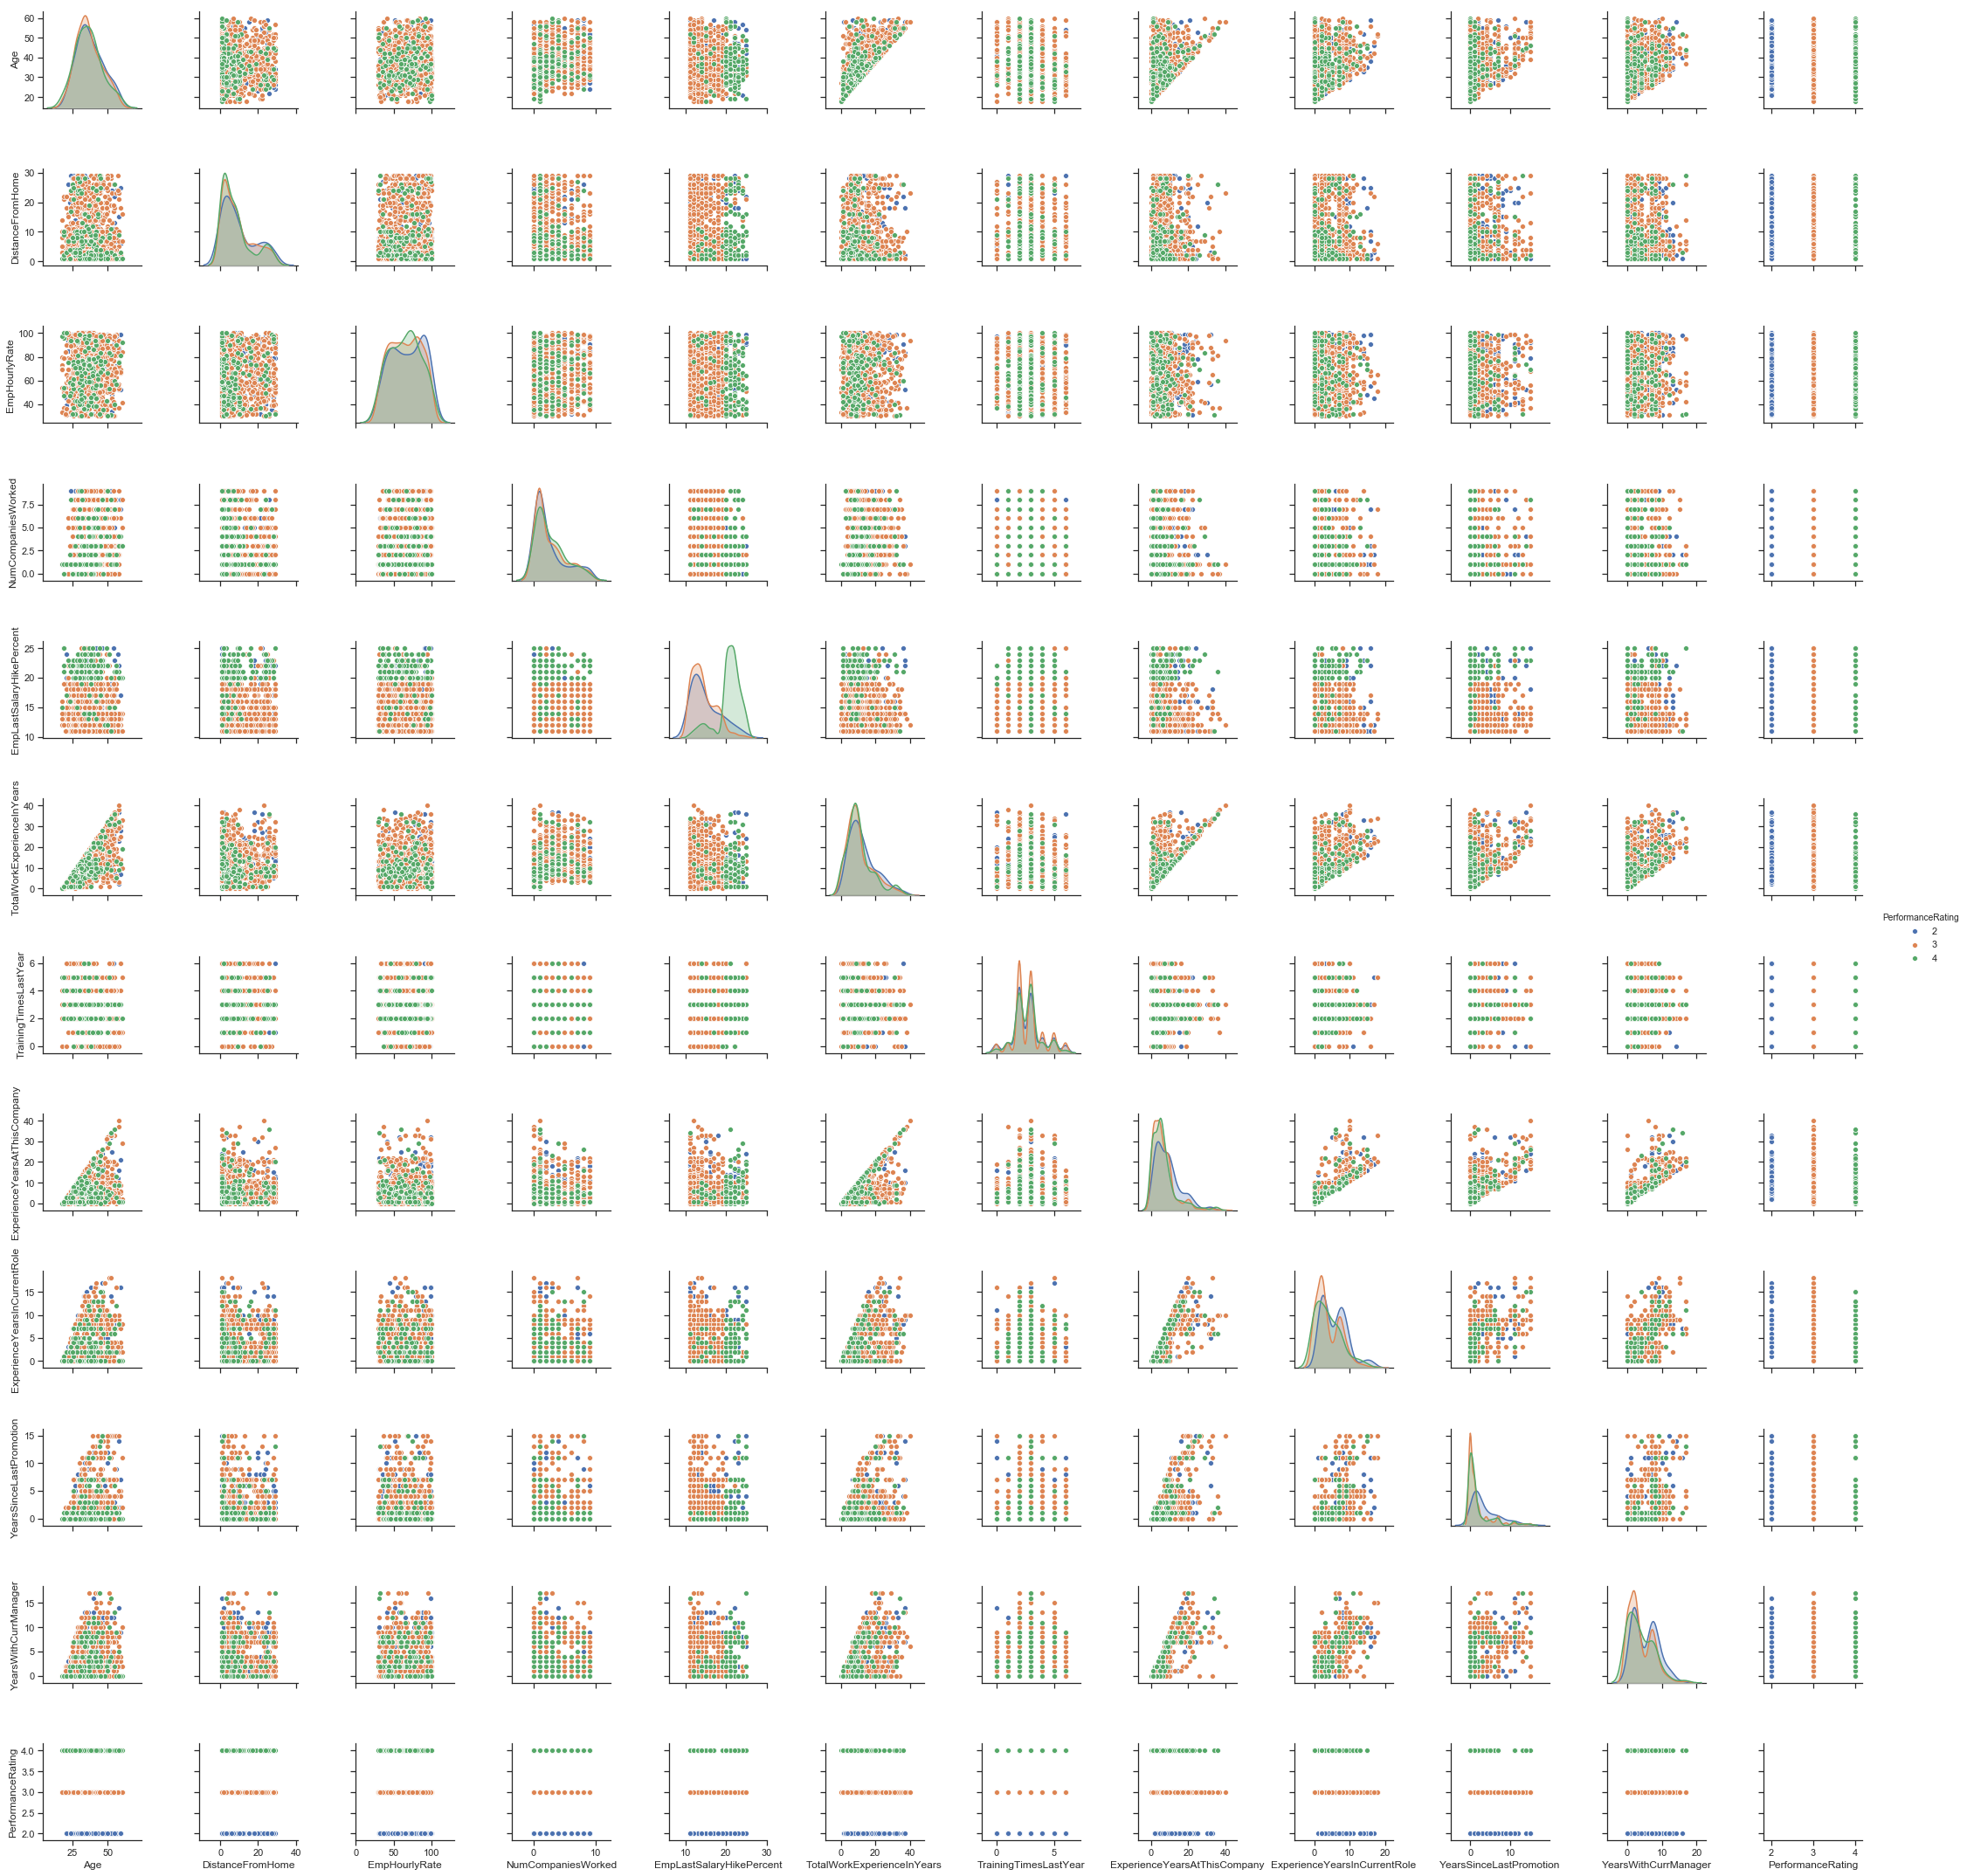

In [52]:
num = [u'Age', u'DistanceFromHome', u'EmpHourlyRate'
 , u'NumCompaniesWorked', u'EmpLastSalaryHikePercent'
 , u'TotalWorkExperienceInYears'
 , u'TrainingTimesLastYear'
 , u'ExperienceYearsAtThisCompany', u'ExperienceYearsInCurrentRole'
 , u'YearsSinceLastPromotion', u'YearsWithCurrManager'
 , u'PerformanceRating']
import seaborn as sns
sns.set(style="ticks", color_codes=True)

p = sns.pairplot(df[num],hue="PerformanceRating")

Observation:
    
    From Pair Plot concluded that EmployeeLastSalaryHikePercent attributes is linearly separable for each Numerical Variablea and therefore it is a important feature to determine PerformanceRating

# Conclusion 

- In Datascience Department Only one employee belongs to performace Rating category 2 , 17 employee in category 3 and 2 emplyoee in category 4.
- In Development Department 13 employee belongs to performace Rating category 2 , 304 employee in category 3 and 44 emplyoee in category 4.
- In finance Department 15 employee belongs to performace Rating category 2 , 30 employee in category 3 and 4 emplyoee in category 4.
- In Human Resources 10 employee belongs to performace Rating category 2 , 38 employee in category 3 and 6 emplyoee in category 4.
- In Research and Development Department 68 employee belongs to performace Rating category 2 , 251 employee in category 3 and 35 emplyoee in category 4.
- In Sales Department 87 employee belongs to performace Rating category 2 , 251 employee in category 3 and 35 emplyoee in category 4.
- In Sales Department max employee working as compare to other department.
- Max employee belongs to performace_rating category of 3 i.e their performance is excellent.
- From Pair Plot concluded that EmployeeLastSalaryHikePercent attributes is linearly separable for each Numerical Variablea and therefore it is a important feature to determine Performance Rating.
- From Chi-square test we came to know that EmpDepartment and performancerating is dependent as the p value is less than 0.05.
- Percentage of frequency of employee indepartment Datascience is less which performace rating is 2.
- Percentage of frequency of employee indepartment Sales is less which performace rating is 2.